# Melbourne_Houses_Price_analysis_&_Prediction

# https://www.kaggle.com/code/phoonyein/melbourne-houses-price-analysis-prediction

# Objective : 
    Create a price report and information about the houses of Melbourne.

# import the necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# lets load the boston dataset

In [2]:
Melbourne_house = pd.read_csv(r"G:\Projects\all_projects_MLearning\ML_project\Project_dataset\ALL HOUSE PRICE PREDICTION DATASET for regression\Melbourne_housing_FULL.csv")
Melbourne_house.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Analysing and peprocessing

In [3]:
len(Melbourne_house)

34857

In [4]:
Melbourne_house.shape, Melbourne_house.size, Melbourne_house.dtypes

((34857, 21),
 731997,
 Suburb            object
 Address           object
 Rooms              int64
 Type              object
 Price            float64
 Method            object
 SellerG           object
 Date              object
 Distance         float64
 Postcode         float64
 Bedroom2         float64
 Bathroom         float64
 Car              float64
 Landsize         float64
 BuildingArea     float64
 YearBuilt        float64
 CouncilArea       object
 Lattitude        float64
 Longtitude       float64
 Regionname        object
 Propertycount    float64
 dtype: object)

In [5]:
Melbourne_house.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

   ## Column_names	Description
    0	Suburb	Suburb
    1	Address	Address
    2	Rooms	Number of rooms
    3	Type	Type br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
    4	Price	Price in Australian dollars
    5	Method	Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not ...
    6	SellerG	Real Estate Agent
    7	Date	Date sold
    8	Distance	Distance from CBD in Kilometres
    9	Postcode	Postcode
    10	Bedroom2	Scraped # of Bedrooms (from different source)
    11	Bathroom	Number of Bathrooms
    12	Car	Number of carspots
    13	Landsize	Land Size in Metres
    14	BuildingArea	Building Size in Metres
    15	YearBuilt	Year the house was built
    16	CouncilArea	Governing council for the area
    17	Lattitude	Lattitude
    18	Longtitude	Longtitude
    19	Regionname	General Region (West, North West, North, North east …etc)
    20	Propertycount	Number of properties that exist in the suburb.

In [6]:
Melbourne_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
Melbourne_house.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [8]:
Melbourne_house.isnull().sum()  # checking missing value

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

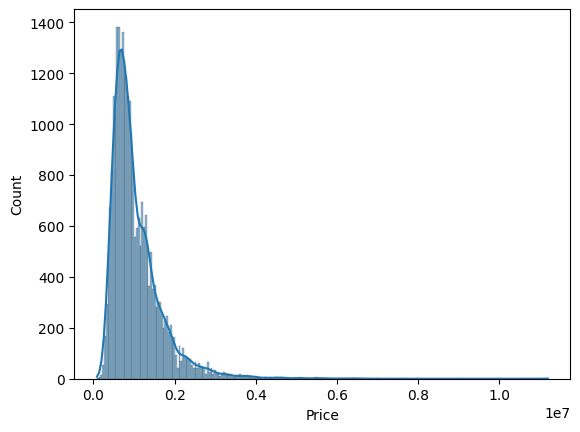

In [9]:
sns.histplot(x='Price', data=Melbourne_house, kde=True)

from the above data is skewed and have outliers, so use median for missing value treatement

In [10]:
Melbourne_house['Price'].fillna(Melbourne_house['Price'].median(), inplace = True)

In [11]:
Melbourne_house.isnull().sum()  # checking missing value of price

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: xlabel='Distance', ylabel='Count'>

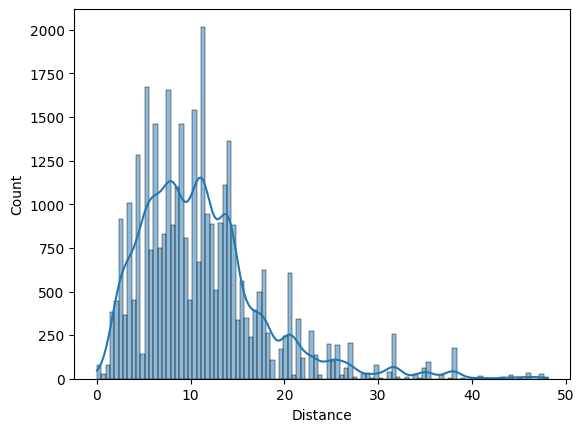

In [12]:
sns.histplot(x='Distance', data=Melbourne_house, kde=True)

from above, use mean for missing value 

In [13]:
Melbourne_house['Distance'].unique

<bound method Series.unique of 0        2.5
1        2.5
2        2.5
3        2.5
4        2.5
        ... 
34852    6.3
34853    6.3
34854    6.3
34855    6.3
34856    6.3
Name: Distance, Length: 34857, dtype: float64>

In [14]:
Melbourne_house['Distance'].fillna(Melbourne_house['Distance'].mean(), inplace = True)

In [15]:
Melbourne_house.isnull().sum()  # checking missing value of Distance

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: xlabel='Postcode', ylabel='Count'>

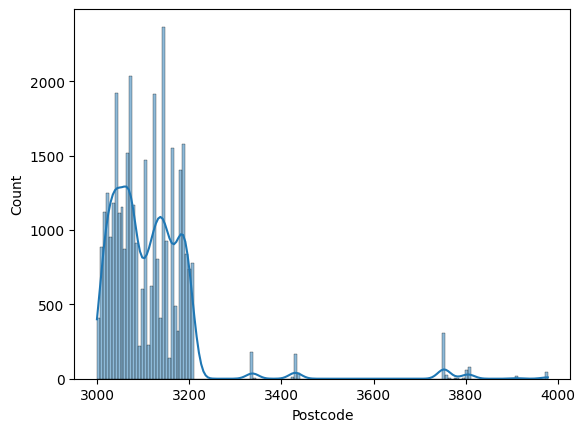

In [16]:
sns.histplot(x='Postcode', data=Melbourne_house, kde=True)

from the above data is skewed, so use median for missing value treatement

In [17]:
Melbourne_house['Postcode'].fillna(Melbourne_house['Postcode'].median(), inplace = True)

In [18]:
Melbourne_house.isnull().sum()  # checking missing value of Postcode

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: xlabel='Bedroom2', ylabel='Count'>

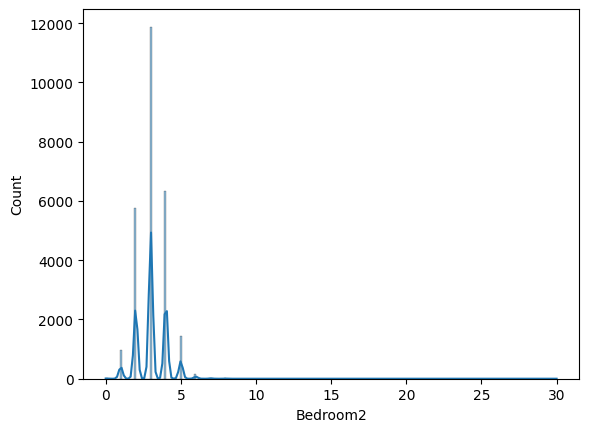

In [19]:
sns.histplot(x='Bedroom2', data=Melbourne_house, kde=True)

In [20]:
Melbourne_house.isnull().sum()  # checking missing value of Bedroom2

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [21]:
Melbourne_house.Bedroom2.value_counts()

3.0     11881
4.0      6348
2.0      5777
5.0      1427
1.0       966
6.0       168
7.0        30
0.0        17
8.0        13
9.0         5
10.0        4
30.0        1
20.0        1
16.0        1
12.0        1
Name: Bedroom2, dtype: int64

1 is repetting more number of times so replace with 1 

In [22]:
Melbourne_house['Bedroom2'].fillna(1, inplace= True)

In [23]:
Melbourne_house.isnull().sum()  # checking missing value of Bedroom2

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: xlabel='Bathroom', ylabel='Count'>

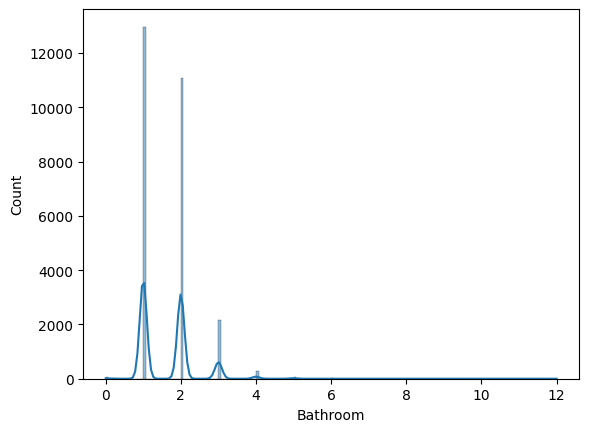

In [24]:
sns.histplot(x='Bathroom', data=Melbourne_house, kde=True)

In [25]:
Melbourne_house.Bathroom.value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
12.0        1
9.0         1
Name: Bathroom, dtype: int64

1 is repetting more number of times so replace with 1

In [26]:
Melbourne_house['Bathroom'].fillna(1, inplace= True)

In [27]:
Melbourne_house.isnull().sum()  # checking missing value of Bathroom

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: xlabel='Car', ylabel='Count'>

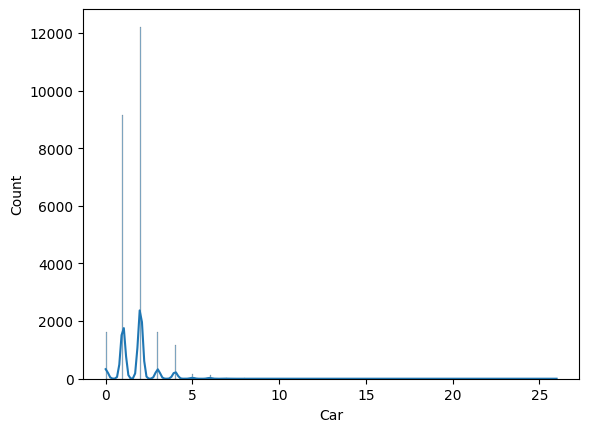

In [28]:
sns.histplot(x='Car', data=Melbourne_house, kde=True)

from the above, use mean for missing value treatement

In [29]:
Melbourne_house['Car'].fillna(Melbourne_house['Car'].mean(), inplace = True)

In [30]:
Melbourne_house.isnull().sum()  # checking missing value of Car

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: xlabel='Landsize', ylabel='Count'>

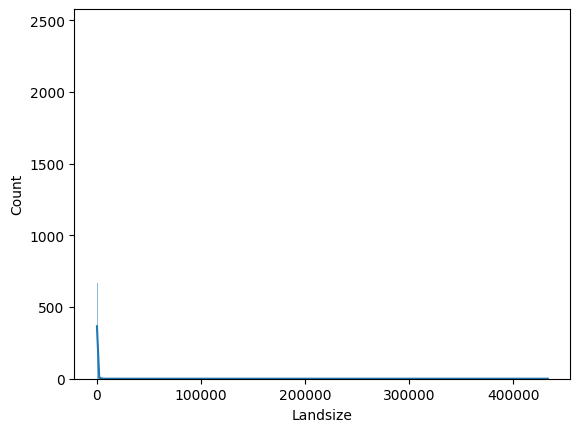

In [31]:
sns.histplot(x='Landsize', data=Melbourne_house, kde=True)

from the above, use mean for missing value treatement

In [32]:
Melbourne_house['Landsize'].fillna(Melbourne_house['Landsize'].mean(), inplace = True)

In [33]:
Melbourne_house.isnull().sum()  # checking missing value of Landsize

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: xlabel='BuildingArea', ylabel='Count'>

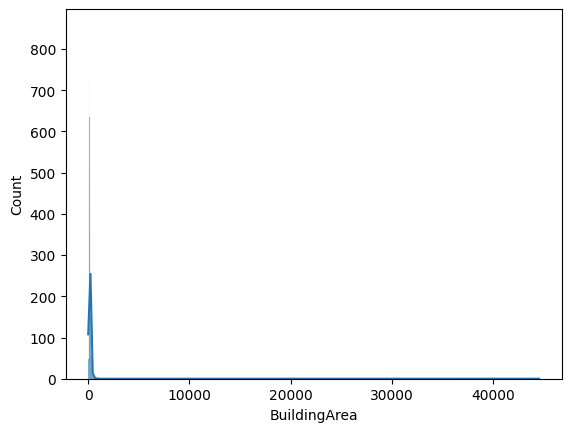

In [34]:
sns.histplot(x='BuildingArea', data=Melbourne_house, kde=True)

from the above, use mean for missing value treatement

In [35]:
Melbourne_house['BuildingArea'].fillna(Melbourne_house['BuildingArea'].mean(), inplace = True)

In [36]:
Melbourne_house.isnull().sum()  # checking missing value of BuildingArea

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea         0
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: xlabel='YearBuilt', ylabel='Count'>

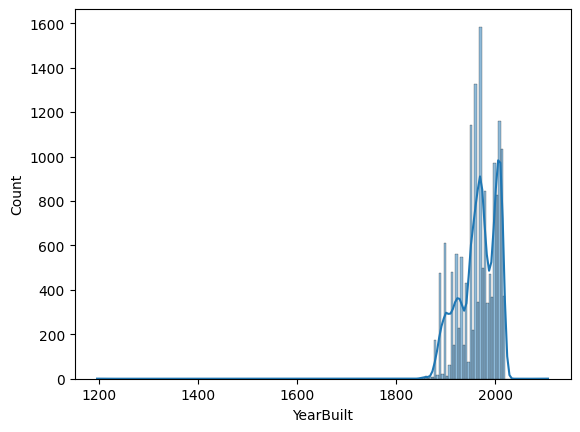

In [37]:
sns.histplot(x='YearBuilt', data=Melbourne_house, kde=True)

from the above, use mean for missing value treatement

In [38]:
Melbourne_house['YearBuilt'].fillna(Melbourne_house['YearBuilt'].mean(), inplace = True)

In [39]:
Melbourne_house.isnull().sum()  # checking missing value of YearBuilt

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Propertycount       3
dtype: int64

<Axes: xlabel='Lattitude', ylabel='Count'>

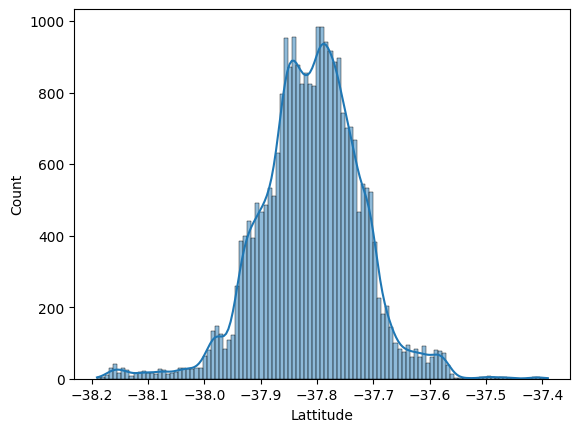

In [40]:
sns.histplot(x='Lattitude', data=Melbourne_house, kde=True)

In [41]:
Melbourne_house['Lattitude'].fillna(method = 'ffill', inplace = True)

In [42]:
Melbourne_house.isnull().sum()  # checking missing value of Lattitude

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude           0
Longtitude       7976
Regionname          3
Propertycount       3
dtype: int64

<Axes: xlabel='Longtitude', ylabel='Count'>

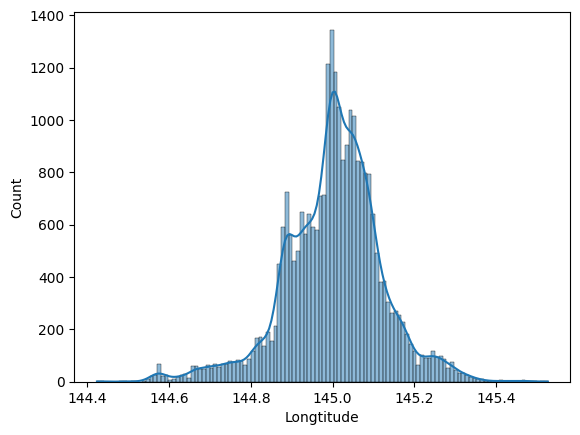

In [43]:
sns.histplot(x='Longtitude', data=Melbourne_house, kde=True)

In [44]:
Melbourne_house['Longtitude'].fillna(method = 'ffill', inplace = True)

In [45]:
Melbourne_house.isnull().sum()  # checking missing value of Lattitude

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    3
dtype: int64

<Axes: xlabel='Propertycount', ylabel='Count'>

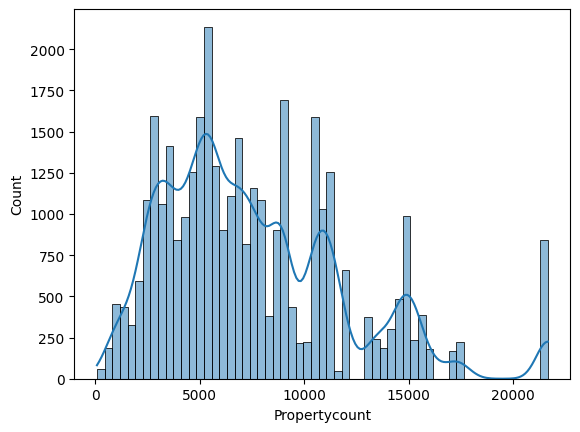

In [46]:
sns.histplot(x='Propertycount', data=Melbourne_house, kde=True)

In [47]:
Melbourne_house['Propertycount'].fillna(method = 'ffill', inplace = True)

In [48]:
Melbourne_house.isnull().sum()  # checking missing value

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    0
dtype: int64

here change CouncilArea and Regionname base on the postcode.

In [49]:
Melbourne_house['Regionname'].value_counts()

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

In [50]:
Melbourne_house['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria', nan], dtype=object)

In [51]:
Melbourne_house['CouncilArea'].value_counts()

Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston City Council   

In [52]:
Melbourne_house.loc[(Melbourne_house['CouncilArea'].isna()) ,['Postcode','CouncilArea','Regionname']]

,Postcode,CouncilArea,Regionname
18523,3011.0,NaN,NaN
26888,3124.0,NaN,NaN
29483,3103.0,NaN,NaN


In [53]:
ps1 = Melbourne_house.loc[(Melbourne_house['Postcode']==3011 )]
ps1

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4377,Footscray,4/33 Ballarat Rd,3,t,585000.0,S,Nelson,3/09/2016,6.4,3011.0,...,1.0,1.000000,259.000000,160.2564,1965.289885,Maribyrnong City Council,-37.79550,144.90630,Western Metropolitan,7570.0
4378,Footscray,202/51 Gordon St,1,u,85000.0,PI,Burnham,3/09/2016,6.4,3011.0,...,1.0,0.000000,0.000000,160.2564,2007.000000,Maribyrnong City Council,-37.79110,144.89000,Western Metropolitan,7570.0
4379,Footscray,4 Adelaide St,4,h,1225000.0,SP,Nelson,3/12/2016,6.4,3011.0,...,2.0,1.000000,319.000000,130.0000,1915.000000,Maribyrnong City Council,-37.79430,144.88750,Western Metropolitan,7570.0
4380,Footscray,11/44 Everard St,2,u,431000.0,SP,Jas,3/12/2016,6.4,3011.0,...,1.0,1.000000,0.000000,160.2564,1965.289885,Maribyrnong City Council,-37.79630,144.88530,Western Metropolitan,7570.0
4381,Footscray,9 Lynch St,3,h,1003000.0,S,Naison,3/12/2016,6.4,3011.0,...,1.0,1.000000,292.000000,98.0000,1900.000000,Maribyrnong City Council,-37.79700,144.90510,Western Metropolitan,7570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,Footscray,21 Stafford St,3,h,931000.0,SP,Jas,24/02/2018,5.1,3011.0,...,1.0,0.000000,240.000000,101.0000,1930.000000,Maribyrnong City Council,-37.79392,144.88418,Western Metropolitan,7570.0
34696,Seddon,38 Alfred St,3,h,870000.0,S,hockingstuart,24/02/2018,5.1,3011.0,...,2.0,2.000000,243.000000,132.0000,2000.000000,Maribyrnong City Council,-37.80573,144.88570,Western Metropolitan,2417.0
34697,Seddon,3/1 Florence St,2,h,900000.0,PI,hockingstuart,24/02/2018,5.1,3011.0,...,1.0,1.728845,593.598993,160.2564,1965.289885,Maribyrnong City Council,-37.80573,144.88570,Western Metropolitan,2417.0
34698,Seddon,23 Seddon St,3,h,870000.0,S,hockingstuart,24/02/2018,5.1,3011.0,...,1.0,1.000000,357.000000,357.0000,1978.000000,Maribyrnong City Council,-37.80846,144.88854,Western Metropolitan,2417.0


from above when postcode is 3011 then 'CouncilArea' == Maribyrnong City Council	, and 'Regionname' == Western Metropolitan. so we replace with these values.

In [54]:
ps2 = Melbourne_house.loc[(Melbourne_house['Postcode']==3124 )]
ps2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2618,Camberwell,28 Brinsley Rd,4,h,2650000.0,S,Jellis,3/09/2016,7.8,3124.0,...,2.0,1.0,652.0,189.0000,1890.000000,Boroondara City Council,-37.82860,145.06860,Southern Metropolitan,8920.0
2619,Camberwell,2/1 Glen Iris Rd,3,t,1615000.0,S,Marshall,3/09/2016,7.8,3124.0,...,1.0,2.0,389.0,160.2564,1965.289885,Boroondara City Council,-37.84350,145.06950,Southern Metropolitan,8920.0
2620,Camberwell,6 Kalang Rd,3,h,870000.0,PN,Rayner,3/09/2016,7.8,3124.0,...,1.0,1.0,980.0,154.0000,1930.000000,Boroondara City Council,-37.84410,145.07750,Southern Metropolitan,8920.0
2621,Camberwell,1288 Toorak Rd,4,h,3225000.0,SA,RT,3/09/2016,7.8,3124.0,...,3.0,2.0,934.0,160.2564,1965.289885,Boroondara City Council,-37.84960,145.08690,Southern Metropolitan,8920.0
2622,Camberwell,1/19 Alma Rd,3,h,870000.0,S,Marshall,3/12/2016,7.8,3124.0,...,2.0,2.0,332.0,160.2564,1995.000000,Boroondara City Council,-37.83720,145.05850,Southern Metropolitan,8920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34080,Camberwell,29 Oxford St,3,h,1888000.0,S,Buxton,24/02/2018,7.7,3124.0,...,1.0,2.0,770.0,160.2564,1965.289885,Boroondara City Council,-37.84455,145.09310,Southern Metropolitan,8920.0
34081,Camberwell,23 Radnor St,3,h,870000.0,SP,Marshall,24/02/2018,7.7,3124.0,...,2.0,2.0,597.0,176.0000,1915.000000,Boroondara City Council,-37.84120,145.06197,Southern Metropolitan,8920.0
34082,Camberwell,674 Riversdale Rd,3,h,870000.0,SP,Buxton,24/02/2018,7.7,3124.0,...,1.0,2.0,675.0,155.0000,1940.000000,Boroondara City Council,-37.83329,145.07210,Southern Metropolitan,8920.0
34083,Camberwell,1088 Toorak Rd,3,h,870000.0,VB,Marshall,24/02/2018,7.7,3124.0,...,1.0,1.0,647.0,0.0000,1965.289885,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920.0


from above when postcode is 3124 then 'CouncilArea' == Boroondara City Council, and 'Regionname' == Southern Metropolitan.
so we replace with these values.

In [55]:
ps3 = Melbourne_house.loc[(Melbourne_house['Postcode']==3103 )]
ps3

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
846,Balwyn,1/4 Glenluss St,3,t,870000.0,S,Jellis,3/09/2016,9.7,3103.0,...,2.0,2.000000,348.000000,160.2564,1965.289885,Boroondara City Council,-37.80530,145.09340,Southern Metropolitan,5682.0
847,Balwyn,166 Gordon St,2,h,2100000.0,S,Marshall,3/09/2016,9.7,3103.0,...,1.0,1.000000,659.000000,123.0000,1920.000000,Boroondara City Council,-37.80940,145.08070,Southern Metropolitan,5682.0
848,Balwyn,36 Narrak Rd,4,h,1800000.0,VB,Marshall,3/09/2016,9.7,3103.0,...,2.0,2.000000,715.000000,218.0000,1985.000000,Boroondara City Council,-37.81100,145.09580,Southern Metropolitan,5682.0
849,Balwyn,2/16 Westminster St,2,t,1255000.0,S,Noel,3/09/2016,9.7,3103.0,...,1.0,1.000000,208.000000,129.0000,2000.000000,Boroondara City Council,-37.81280,145.09750,Southern Metropolitan,5682.0
850,Balwyn,2/74 Balwyn Rd,3,u,1070000.0,SA,Philip,3/12/2016,9.7,3103.0,...,2.0,2.000000,206.000000,112.0000,1998.000000,Boroondara City Council,-37.81610,145.08120,Southern Metropolitan,5682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33004,Balwyn,122 Winmalee Rd,3,h,3400000.0,PI,Jellis,17/03/2018,7.9,3103.0,...,2.0,4.000000,1490.000000,160.2564,1965.289885,Boroondara City Council,-37.80828,145.09503,Southern Metropolitan,5682.0
33960,Balwyn,110 Gordon St,5,h,4350000.0,VB,Marshall,24/02/2018,7.9,3103.0,...,5.0,2.000000,641.000000,160.2564,1965.289885,Boroondara City Council,-37.80862,145.07452,Southern Metropolitan,5682.0
33961,Balwyn,6/26 Gordon St,2,t,700000.0,VB,hockingstuart,24/02/2018,7.9,3103.0,...,1.0,1.728845,593.598993,160.2564,1965.289885,Boroondara City Council,-37.80862,145.07452,Southern Metropolitan,5682.0
33962,Balwyn,2/16 Westminster St,2,h,1380000.0,S,Marshall,24/02/2018,7.9,3103.0,...,1.0,1.728845,593.598993,160.2564,1965.289885,Boroondara City Council,-37.80862,145.07452,Southern Metropolitan,5682.0


from above when postcode is 3103 then 'CouncilArea' == Boroondara City Council, and 'Regionname' == Southern Metropolitan. so we replace with these values.

In [56]:
Melbourne_house.loc[(Melbourne_house['CouncilArea'].isna()) & (Melbourne_house['Postcode']==3011) , 'CouncilArea'] = "Maribyrnong City Council"
Melbourne_house.loc[(Melbourne_house['CouncilArea'].isna()) & (Melbourne_house['Postcode']==3124) , 'CouncilArea'] = "Boroondara City Council"
Melbourne_house.loc[(Melbourne_house['CouncilArea'].isna()) & (Melbourne_house['Postcode']==3103) , 'CouncilArea'] = "Boroondara City Council"

In [57]:
Melbourne_house.loc[(Melbourne_house['Regionname'].isna()) & (Melbourne_house['Postcode']==3011) , 'Regionname'] = "Western Metropolitan"
Melbourne_house.loc[(Melbourne_house['Regionname'].isna()) & (Melbourne_house['Postcode']==3124) , 'Regionname'] = "Southern Metropolitan"
Melbourne_house.loc[(Melbourne_house['Regionname'].isna()) & (Melbourne_house['Postcode']==3103) , 'Regionname'] = "Southern Metropolitan"

In [58]:
Melbourne_house.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [59]:
Melbourne_house.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,160.2564,1965.289885,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,160.2564,1965.289885,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0000,1900.000000,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,160.2564,1965.289885,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0000,1900.000000,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [60]:
Melbourne_house.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,3.485700e+04,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000
mean,3.031012,1.010838e+06,11.184929,3116.062484,2.593224,1.477350,1.728845,593.598993,160.256400,1965.289885,-37.813577,145.004454,7572.855065
std,0.969933,5.719992e+05,6.788795,109.022361,1.232070,0.686361,0.875119,2763.694121,251.943934,24.932350,0.092062,0.117715,4427.925923
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.950000e+05,6.400000,3051.000000,1.000000,1.000000,1.000000,357.000000,160.000000,1965.289885,-37.866900,144.937700,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,1.000000,1.728845,593.598993,160.256400,1965.289885,-37.809880,145.010600,6763.000000
75%,4.000000,1.150000e+06,14.000000,3156.000000,3.000000,2.000000,2.000000,598.000000,160.256400,1965.289885,-37.754200,145.075700,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


In [61]:
Melbourne_house.corr()

C:\Users\gateway\AppData\Local\Temp\ipykernel_14528\686319225.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Melbourne_house.corr()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.391636,0.271511,0.085890,0.663150,0.538171,0.337780,0.030136,0.098468,-0.008660,-0.005091,0.097139,-0.071683
Price,0.391636,1.000000,-0.181801,0.035050,0.290424,0.325440,0.150389,0.026229,0.063438,-0.193304,-0.167904,0.149526,-0.052815
Distance,0.271511,-0.181801,1.000000,0.481566,0.184827,0.113241,0.211768,0.048717,0.050110,0.220757,-0.104397,0.199658,-0.018144
Postcode,0.085890,0.035050,0.481566,1.000000,0.063442,0.103680,0.060746,0.032452,0.029252,0.063422,-0.238702,0.341984,0.017110
Bedroom2,0.663150,0.290424,0.184827,0.063442,1.000000,0.671919,0.268222,0.024090,0.076606,-0.001106,0.046107,0.038929,-0.049663
Bathroom,0.538171,0.325440,0.113241,0.103680,0.671919,1.000000,0.281782,0.031377,0.099597,0.120087,-0.022957,0.073180,-0.035582
Car,0.337780,0.150389,0.211768,0.060746,0.268222,0.281782,1.000000,0.034846,0.074810,0.095211,-0.007711,0.041931,-0.008171
Landsize,0.030136,0.026229,0.048717,0.032452,0.024090,0.031377,0.034846,1.000000,0.085636,0.010530,0.019578,-0.002087,-0.014453
BuildingArea,0.098468,0.063438,0.050110,0.029252,0.076606,0.099597,0.074810,0.085636,1.000000,0.013914,0.010796,-0.001379,-0.015003
YearBuilt,-0.008660,-0.193304,0.220757,0.063422,-0.001106,0.120087,0.095211,0.010530,0.013914,1.000000,0.060315,-0.015020,0.014550


In [ ]:
sns.pairplot(Melbourne_house, x_vars = ['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'], y_vars = 'Price')

In [ ]:
sns.regplot(Melbourne_house, x='Rooms', y= 'Price')  # regression plot

In [ ]:
sns.regplot(Melbourne_house, x='Bedroom2', y= 'Price')  # regression plot

In [ ]:
sns.regplot(Melbourne_house, x='YearBuilt', y= 'Price')  # regression plot

In [ ]:
X = Melbourne_house[['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']]
y = Melbourne_house['Price']

In [ ]:
X

In [ ]:
Melbourne_house['Suburb'].unique()

In [ ]:
Melbourne_house['Address'].unique()

In [ ]:
Melbourne_house['SellerG'].unique()   

In [ ]:
Melbourne_house['CouncilArea'].unique()

In [ ]:
Melbourne_house['Regionname'].unique()

In [ ]:
Melbourne_house['Type'].unique()

In [ ]:
Melbourne_house['Method'].unique()

In [ ]:
Melbourne_house['Address'] = Melbourne_house['Address'].astype('category')
Melbourne_house['Address'] = Melbourne_house['Address'].cat.codes

In [ ]:
Melbourne_house.head(5)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size= 0.20, random_state = 66)

In [ ]:
len(X_train),len(X_test), len(y_train), len(y_test)

# Linear Regression


In [ ]:
lr=  LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
y_pred

8527168521

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mean_absolute_percentage_error(y_test, y_pred)